<h1><center>Practical Assignement - 2nd part</center></h1>
<h3><center>Statistics and Data Analysis</center></h3>
<center>João Nogueira & Mariana Monteiro</center>

In [35]:
library(e1071)
library(ggplot2)
library(GGally)
require(gridExtra)
library(purrr)
library(tidyr)
library(reshape)
library(FSA)
library(dplyr)
library(repr)
library(FactoMineR)
library("FactoMineR")
library("factoextra")
source("stratified.r")
set.seed(123)

## data description

In [3]:
raw_data = read.csv('winequality-red.csv')
head(raw_data)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5


In [4]:
colSums(is.na(raw_data))

fixed.acidity     volatile.acidity          citric.acid 
                   0                    0                    0 
      residual.sugar            chlorides  free.sulfur.dioxide 
                   0                    0                    0 
total.sulfur.dioxide              density                   pH 
                   0                    0                    0 
           sulphates              alcohol              quality 
                   0                    0                    0

In [5]:
summary(raw_data)

 fixed.acidity   volatile.acidity  citric.acid    residual.sugar  
 Min.   : 4.60   Min.   :0.1200   Min.   :0.000   Min.   : 0.900  
 1st Qu.: 7.10   1st Qu.:0.3900   1st Qu.:0.090   1st Qu.: 1.900  
 Median : 7.90   Median :0.5200   Median :0.260   Median : 2.200  
 Mean   : 8.32   Mean   :0.5278   Mean   :0.271   Mean   : 2.539  
 3rd Qu.: 9.20   3rd Qu.:0.6400   3rd Qu.:0.420   3rd Qu.: 2.600  
 Max.   :15.90   Max.   :1.5800   Max.   :1.000   Max.   :15.500  
   chlorides       free.sulfur.dioxide total.sulfur.dioxide    density      
 Min.   :0.01200   Min.   : 1.00       Min.   :  6.00       Min.   :0.9901  
 1st Qu.:0.07000   1st Qu.: 7.00       1st Qu.: 22.00       1st Qu.:0.9956  
 Median :0.07900   Median :14.00       Median : 38.00       Median :0.9968  
 Mean   :0.08747   Mean   :15.87       Mean   : 46.47       Mean   :0.9967  
 3rd Qu.:0.09000   3rd Qu.:21.00       3rd Qu.: 62.00       3rd Qu.:0.9978  
 Max.   :0.61100   Max.   :72.00       Max.   :289.00       Max.   :1

In [6]:
data = stratified(raw_data, 'quality', 15)

Some groups
---3---
contain fewer observations than desired number of samples.
All observations have been returned from those groups.


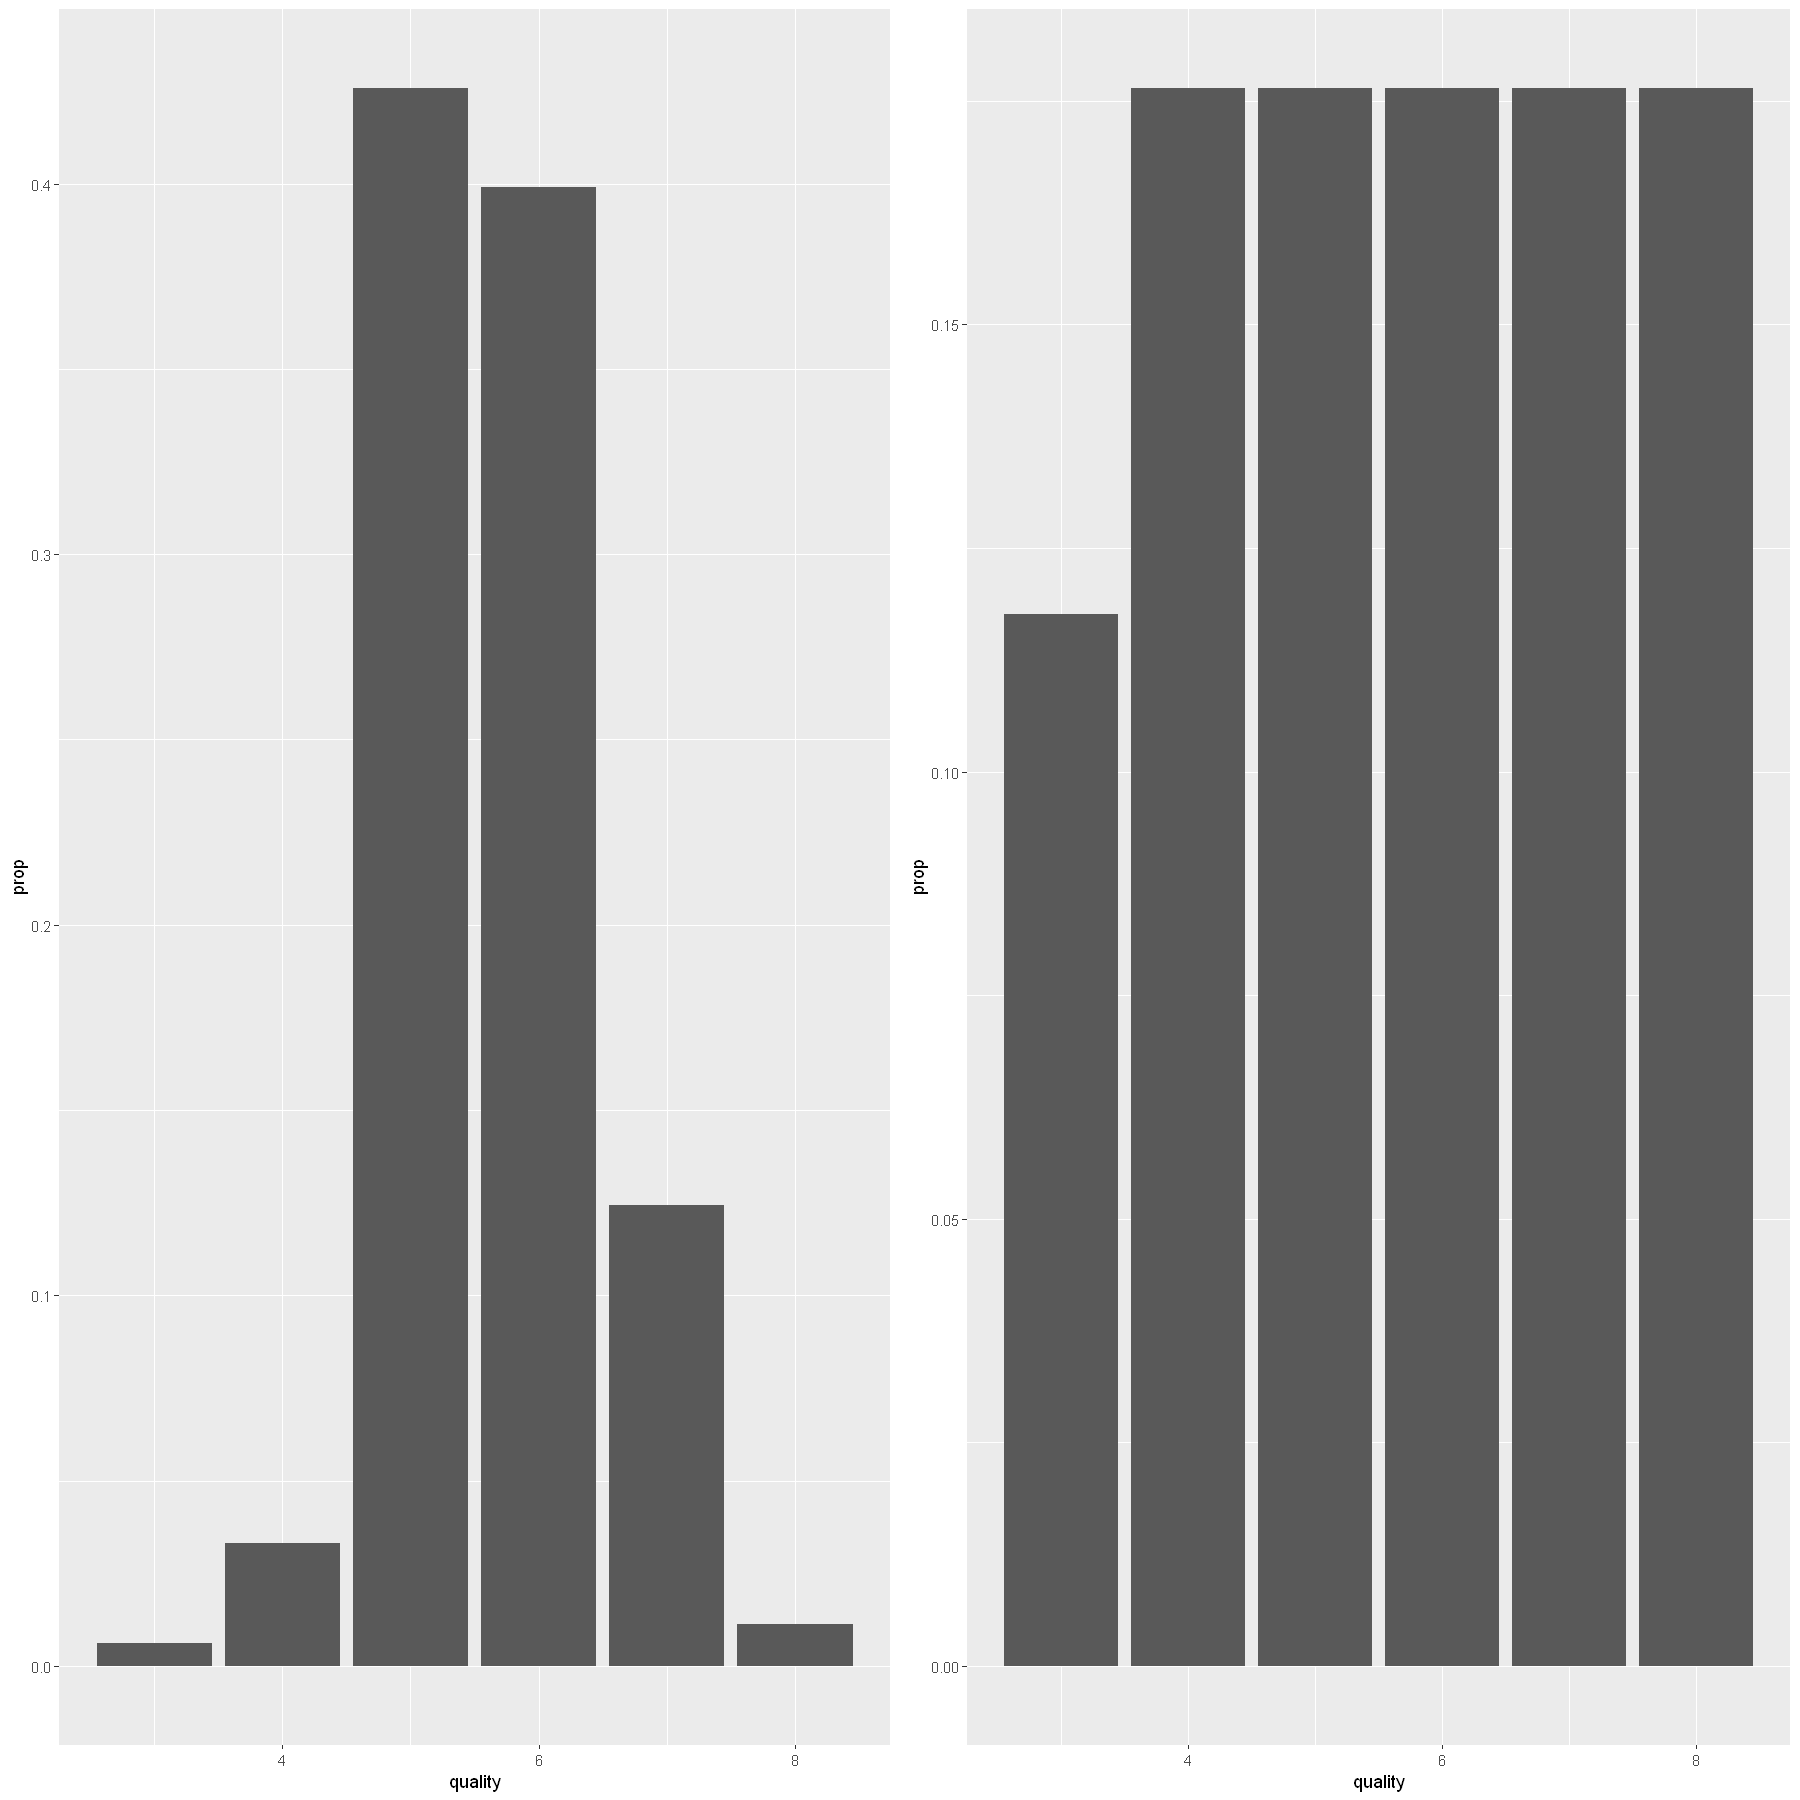

In [7]:
# check proportions are still the same
raw_plot = ggplot(raw_data, aes(x=quality)) + geom_bar(aes(y = ..prop.., group = 1))
strat_plot = ggplot(data, aes(x=quality)) + geom_bar(aes(y = ..prop.., group = 1))
grid.arrange(raw_plot, strat_plot, ncol=2)

In [8]:
summary(data)

 fixed.acidity    volatile.acidity  citric.acid     residual.sugar 
 Min.   : 5.000   Min.   :0.2100   Min.   :0.0000   Min.   :1.200  
 1st Qu.: 7.200   1st Qu.:0.3800   1st Qu.:0.0600   1st Qu.:1.800  
 Median : 8.100   Median :0.5300   Median :0.2600   Median :2.100  
 Mean   : 8.493   Mean   :0.5638   Mean   :0.2767   Mean   :2.488  
 3rd Qu.: 9.900   3rd Qu.:0.6750   3rd Qu.:0.4400   3rd Qu.:2.600  
 Max.   :15.000   Max.   :1.5800   Max.   :1.0000   Max.   :6.700  
   chlorides       free.sulfur.dioxide total.sulfur.dioxide    density      
 Min.   :0.04400   Min.   : 3.00       Min.   :  7.00       Min.   :0.9908  
 1st Qu.:0.06400   1st Qu.: 6.00       1st Qu.: 15.00       1st Qu.:0.9952  
 Median :0.07800   Median : 9.00       Median : 27.00       Median :0.9964  
 Mean   :0.08884   Mean   :13.24       Mean   : 35.76       Mean   :0.9966  
 3rd Qu.:0.09400   3rd Qu.:18.00       3rd Qu.: 48.00       3rd Qu.:0.9981  
 Max.   :0.61000   Max.   :42.00       Max.   :120.00       Ma

## Univariate analysis  

### Descriptive statistics 

In [9]:
data.frame(mean = colMeans(data), trimmed_mean_10 = sapply(data, mean, trim = 0.1), median = sapply(data, median), std = sapply(data, sd), iqr = sapply(data, IQR), kurtosis = sapply(data, kurtosis), skewness = sapply(data, skewness))

,mean,trimmed_mean_10,median,std,iqr,kurtosis,skewness
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
fixed.acidity,8.49294118,8.37391304,8.10000,1.89572126,2.70000,0.3759490,0.73309901
volatile.acidity,0.56382353,0.54028986,0.53000,0.24554925,0.29500,2.1305642,1.19634462
citric.acid,0.27670588,0.26028986,0.26000,0.22285159,0.38000,-0.2305620,0.55949069
residual.sugar,2.48823529,2.22318841,2.10000,1.22408000,0.80000,3.6545691,2.10382261
chlorides,0.08883529,0.07849275,0.07800,0.06547861,0.03000,44.9983060,6.20910159
free.sulfur.dioxide,13.23529412,11.59420290,9.00000,10.28712448,12.00000,0.5692700,1.25502205
total.sulfur.dioxide,35.76470588,31.63768116,27.00000,27.33767985,33.00000,0.7601746,1.25375676
density,0.99655459,0.99657333,0.99643,0.00195573,0.00287,0.1063691,-0.17044561
pH,3.30223529,3.30449275,3.30000,0.17584745,0.18000,0.9056149,-0.21851788


In [10]:
sapply(data, range)

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
5,0.21,0,1.2,0.044,3,7,0.9908,2.74,0.4,8.4,3
15,1.58,1,6.7,0.610,42,120,1.0008,3.75,2.0,14.0,8


Kurtosis and skewness can be better illustrated on the following plots:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


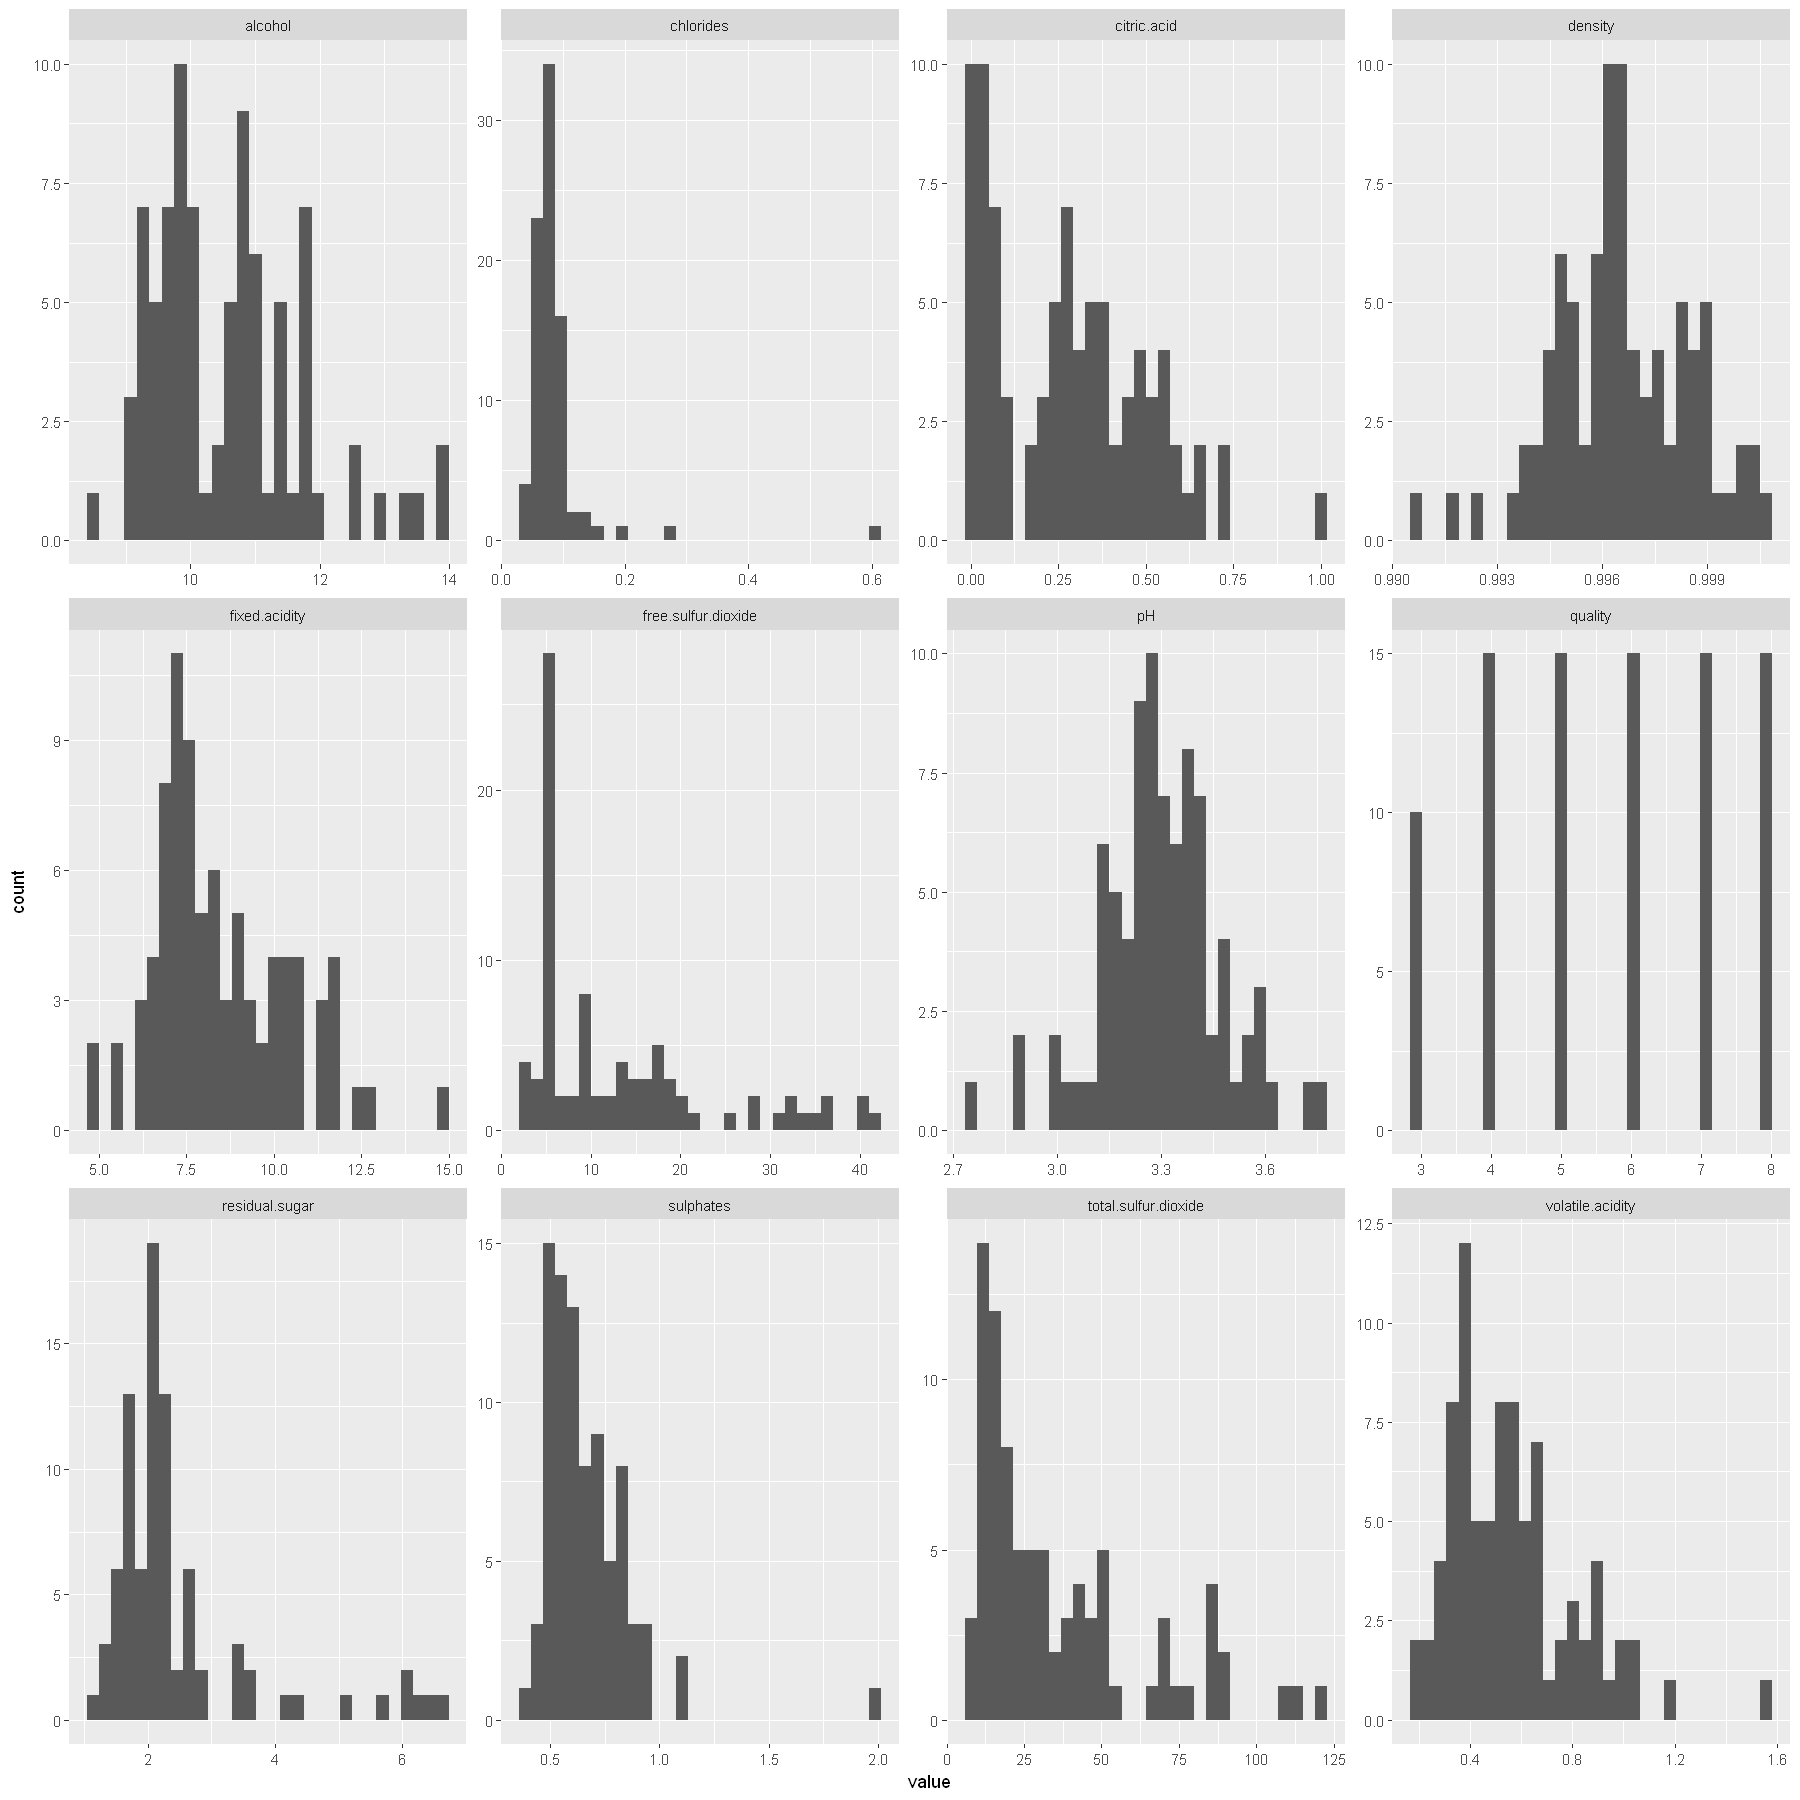

In [11]:
data %>%
  gather() %>% 
  ggplot(aes(value)) +
    facet_wrap(~ key, scales = "free") +
    geom_histogram()

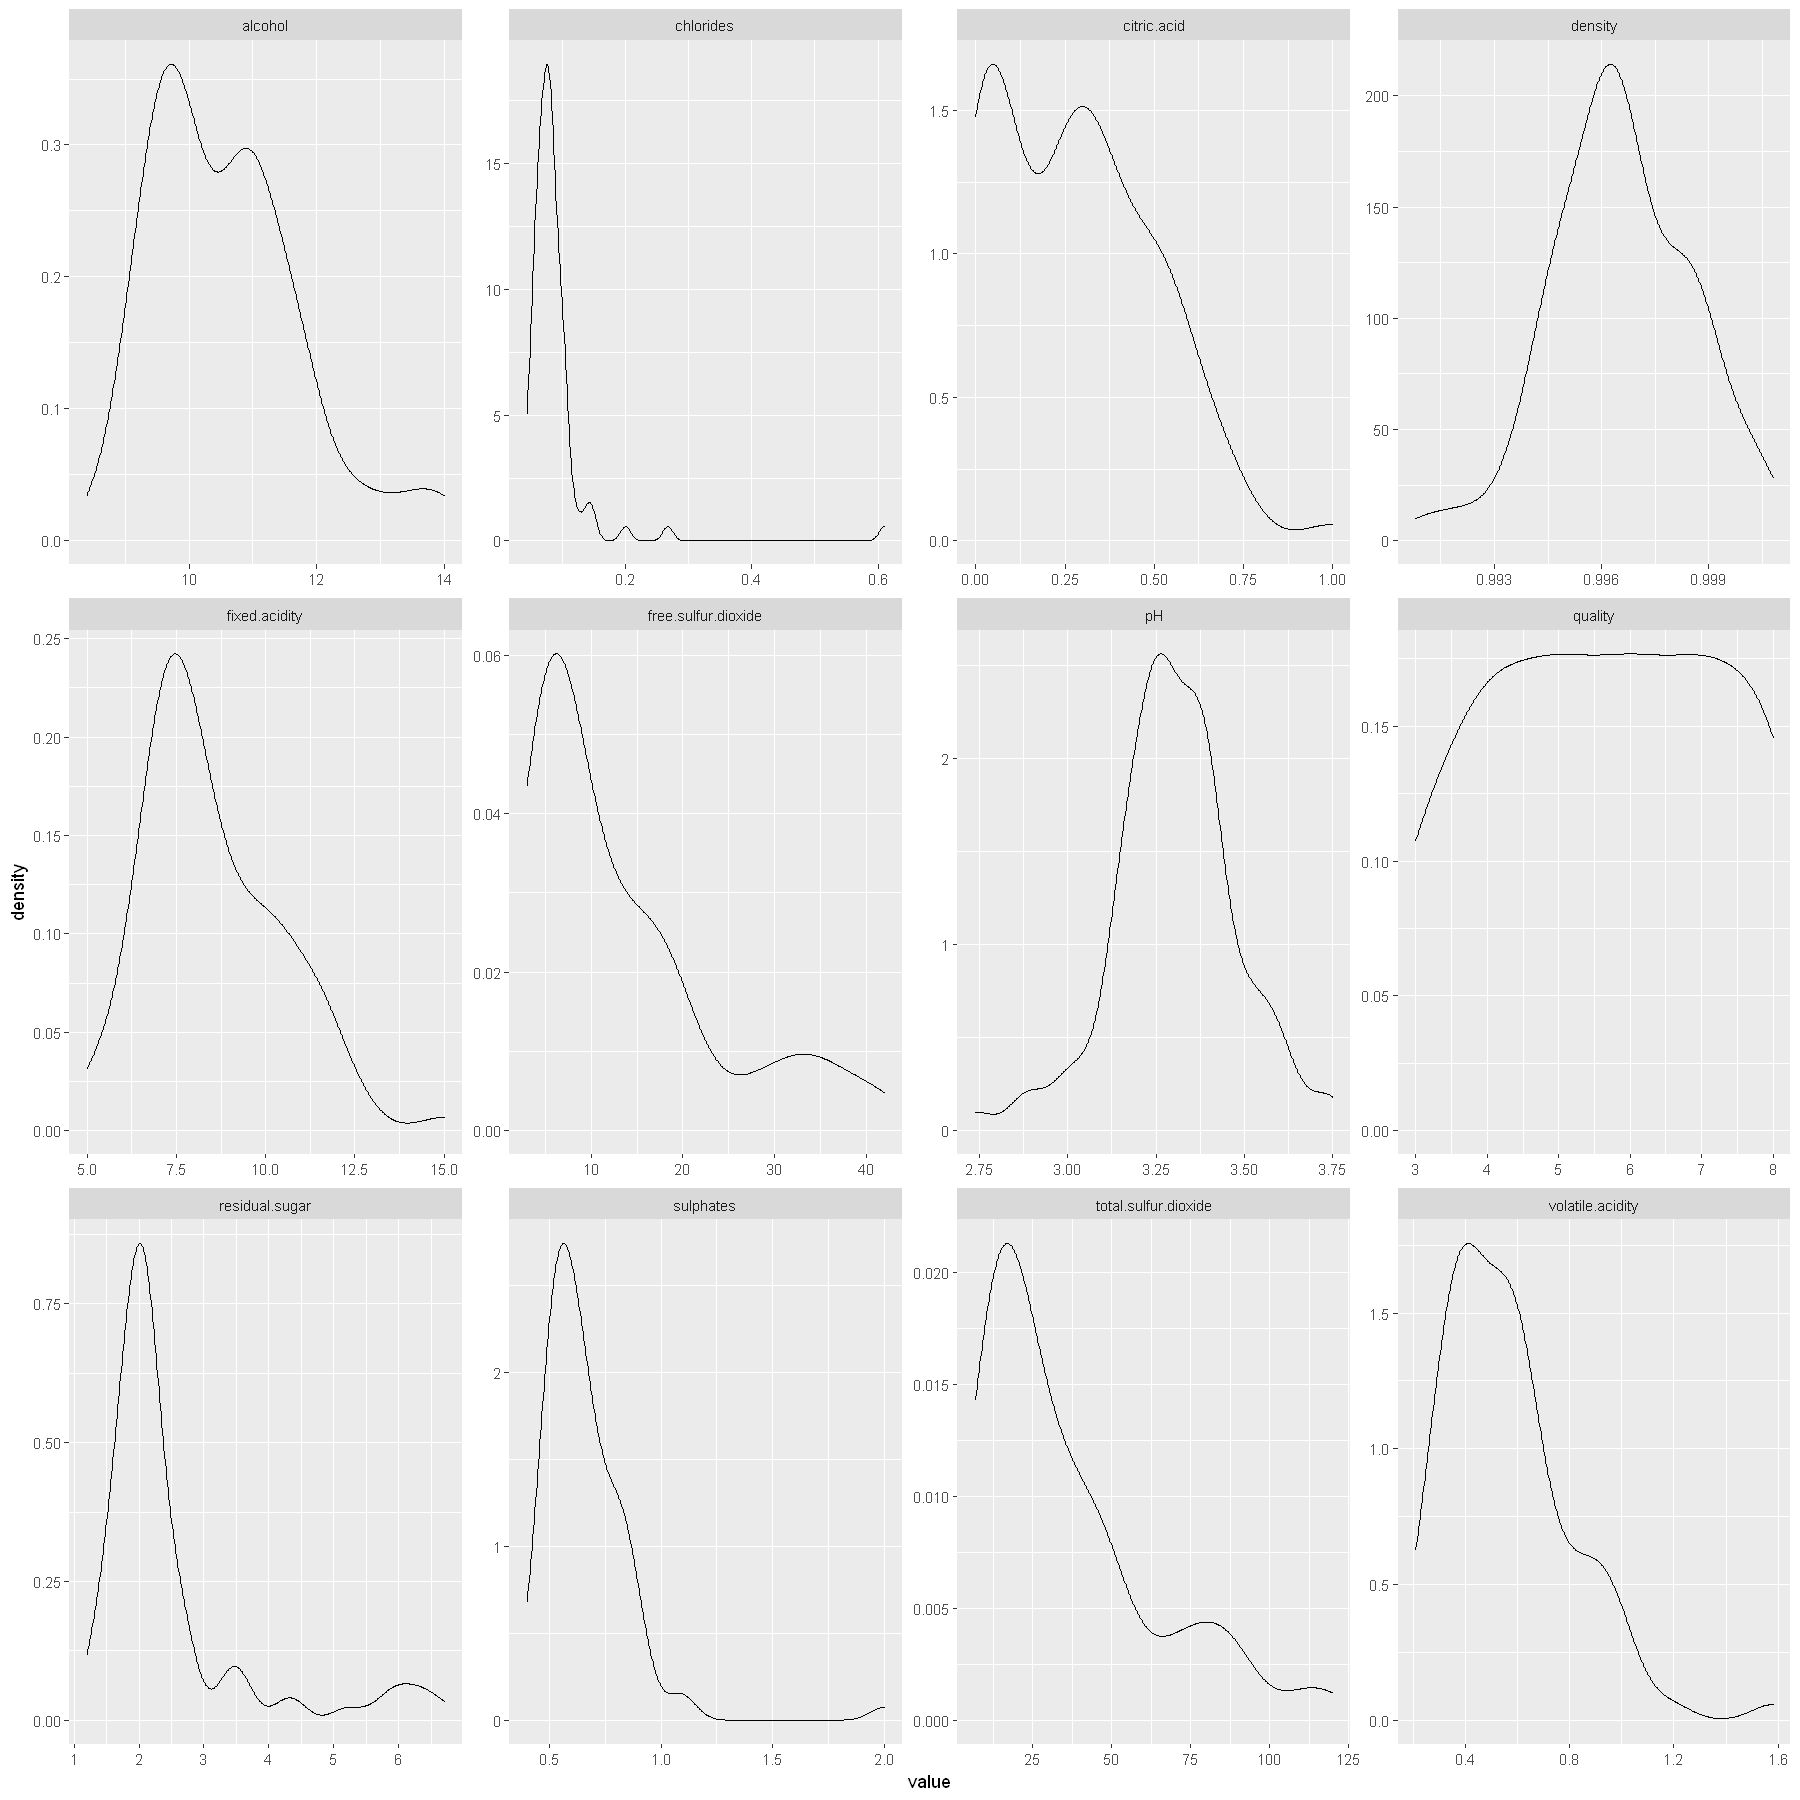

In [12]:
data %>%
  gather() %>% 
  ggplot(aes(value)) +
    facet_wrap(~ key, scales = "free") +
    geom_density()

Using  as id variables


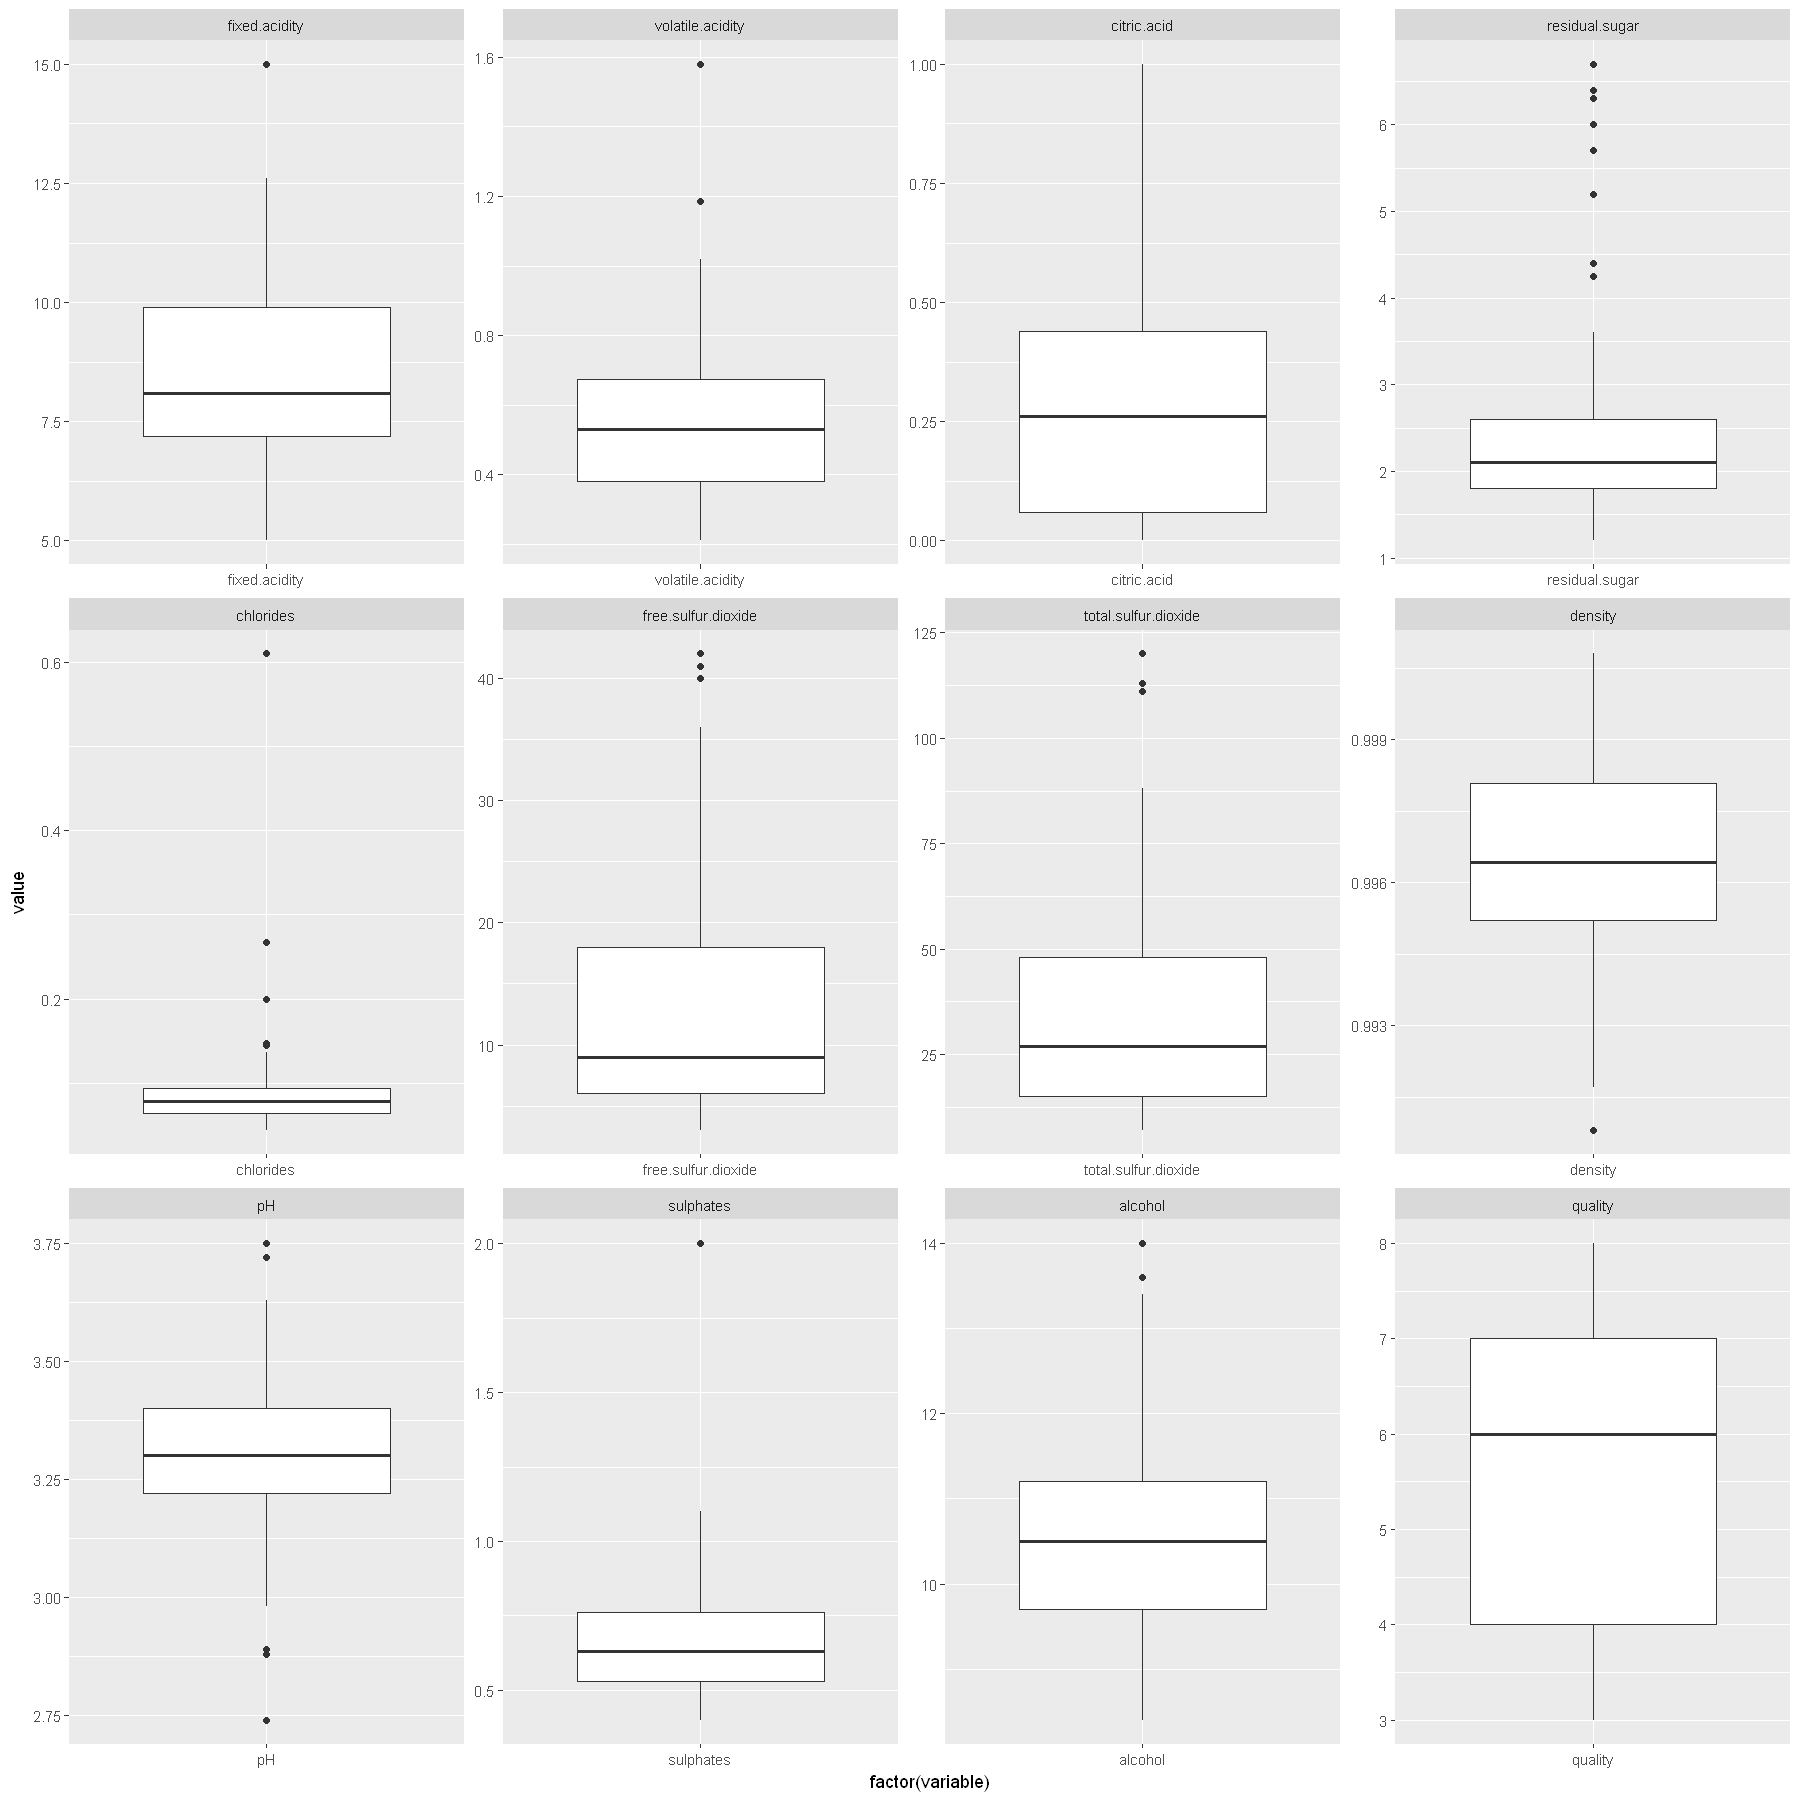

In [13]:
melt_data <- melt(data)
    ggplot(melt_data, aes(factor(variable), value)) + geom_boxplot() + facet_wrap(~variable, scale="free")

## Bivariate Analysis

Warning message in ggscatmat(data, color = "quality", alpha = 0.8):
"Factor variables are omitted in plot"

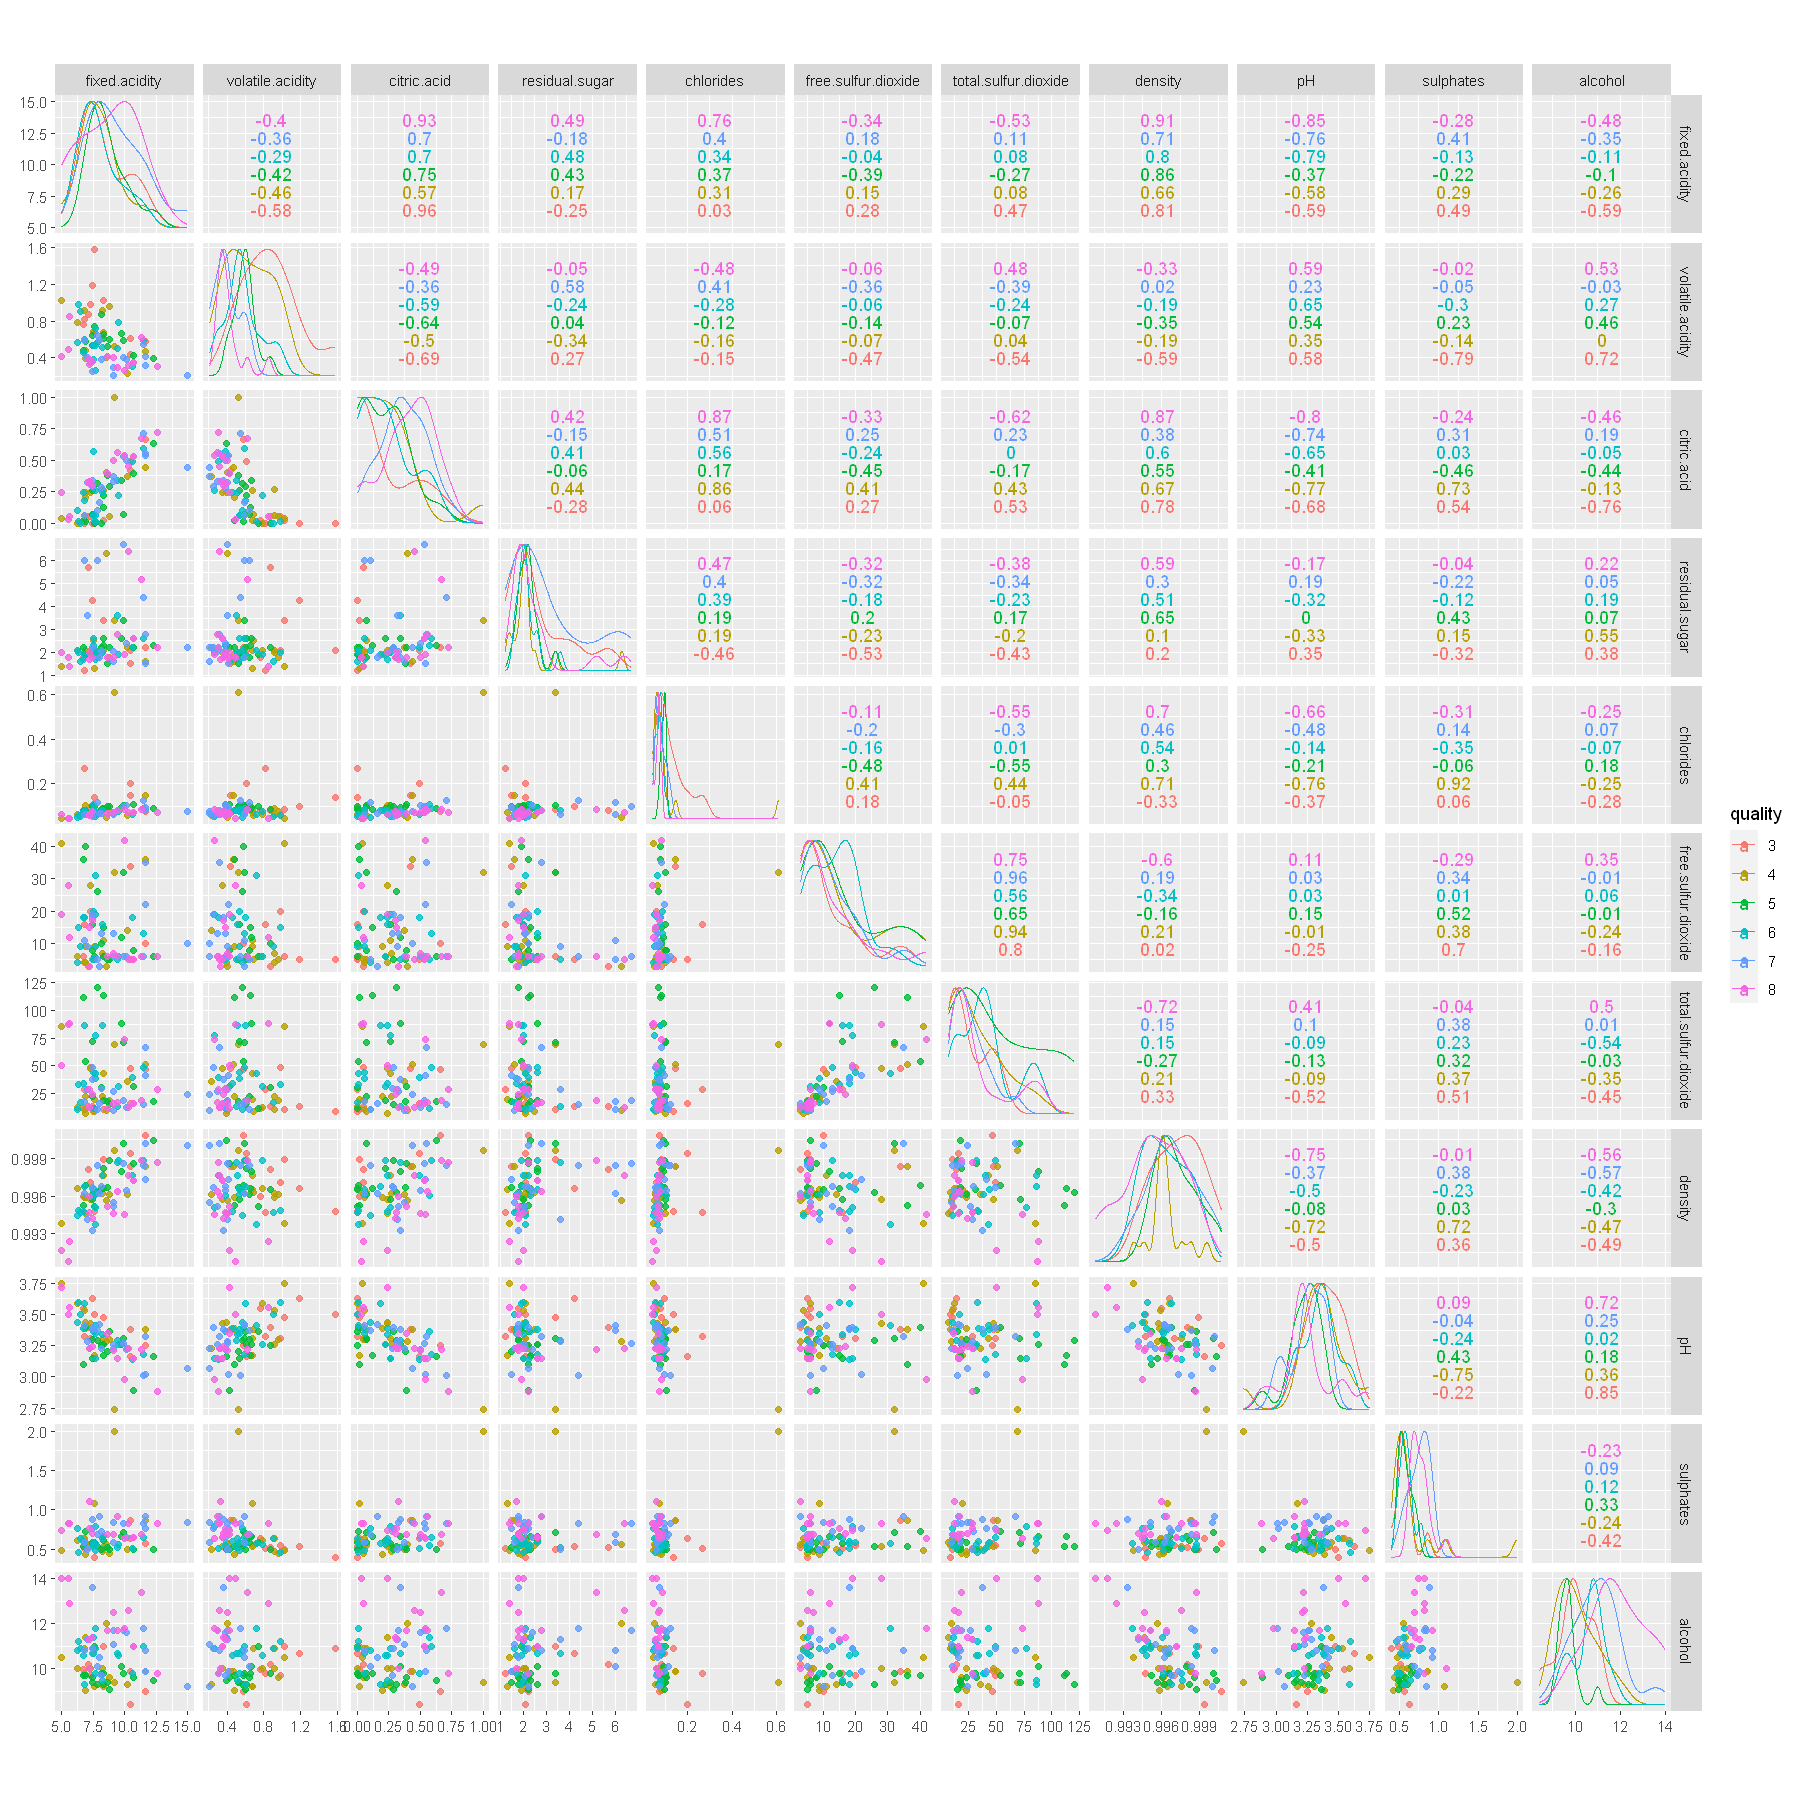

In [14]:
options(repr.plot.width=15, repr.plot.height=15)
ggscatmat(data, color="quality", alpha=0.8)

Warning message:
"`fun.y` is deprecated. Use `fun` instead."Warning message:
"`fun.y` is deprecated. Use `fun` instead."Warning message:
"`fun.y` is deprecated. Use `fun` instead."Warning message:
"`fun.y` is deprecated. Use `fun` instead."Warning message:
"`fun.y` is deprecated. Use `fun` instead."Warning message:
"`fun.y` is deprecated. Use `fun` instead."Warning message:
"`fun.y` is deprecated. Use `fun` instead."Warning message:
"`fun.y` is deprecated. Use `fun` instead."Warning message:
"`fun.y` is deprecated. Use `fun` instead."Warning message:
"`fun.y` is deprecated. Use `fun` instead."Warning message:
"`fun.y` is deprecated. Use `fun` instead."Warning message:
"`fun.y` is deprecated. Use `fun` instead."Warning message:
"`fun.y` is deprecated. Use `fun` instead."Warning message:
"`fun.y` is deprecated. Use `fun` instead."Warning message:
"`fun.y` is deprecated. Use `fun` instead."Warning message:
"`fun.y` is deprecated. Use `fun` instead."Warning message:
"`fun.y` is deprecated.

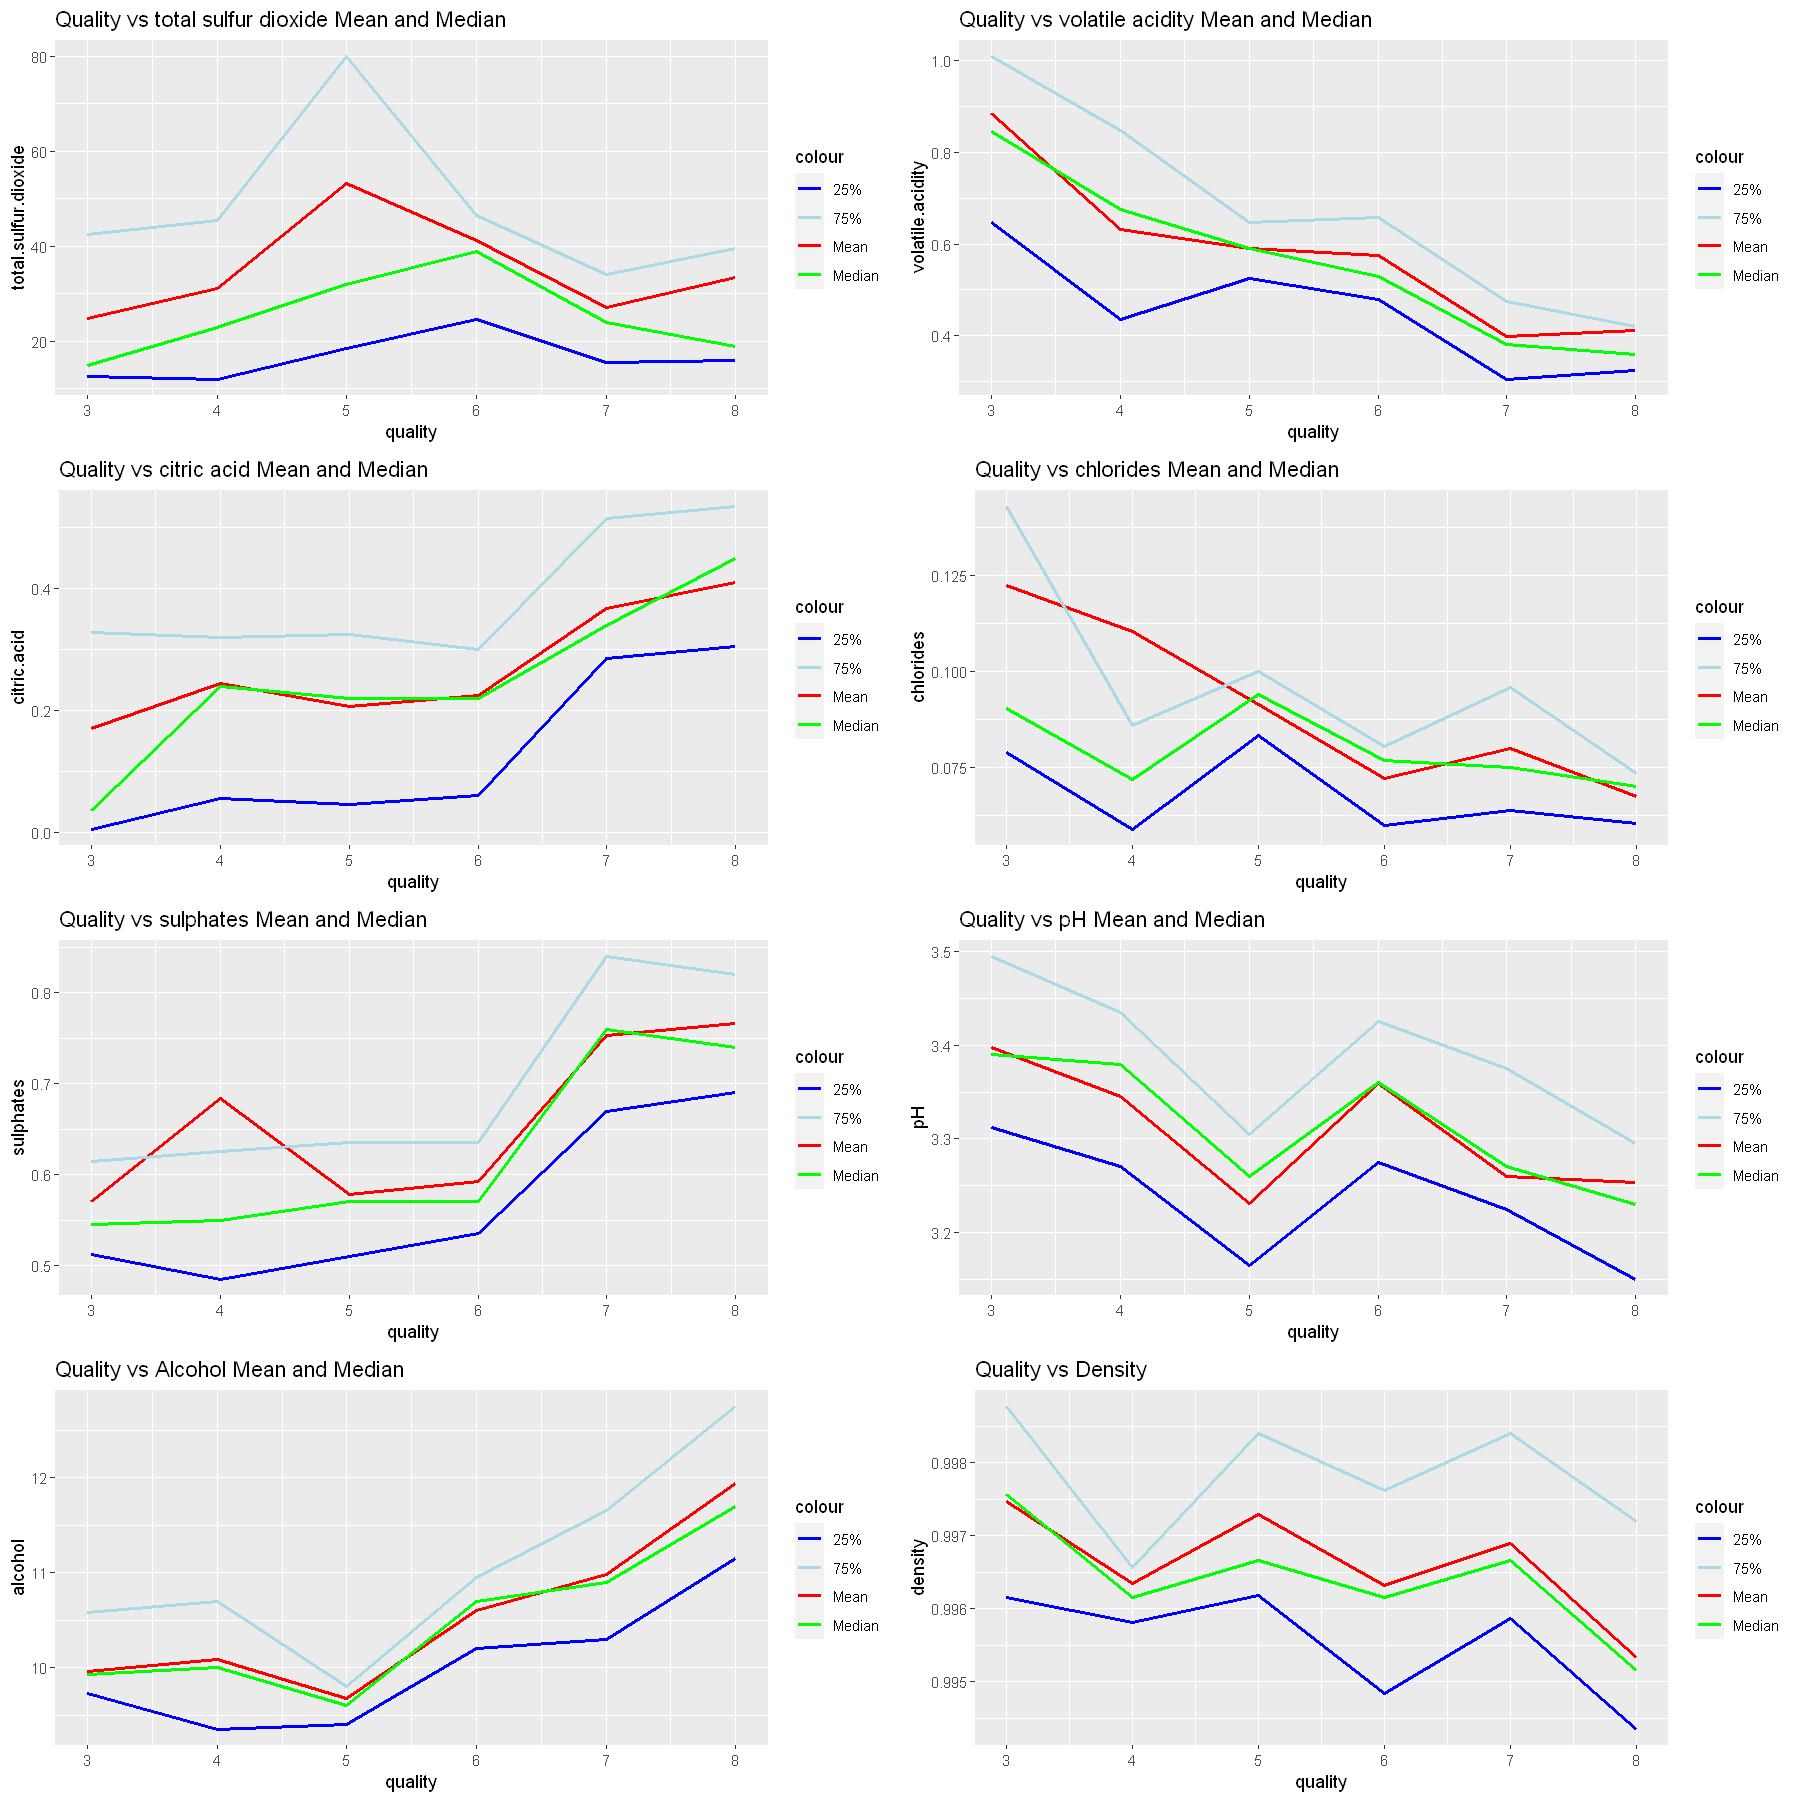

In [34]:
options(repr.plot.width=15, repr.plot.height=15)
p1 = ggplot(aes(y=volatile.acidity, x=quality), data=data)+
  stat_summary(geom='line', fun.y="mean", size=1, aes(color='Mean'))+
  stat_summary(geom='line', fun.y="quantile", fun.args=list(probs=0.5),
            size=1, aes(color='Median'))+
  stat_summary(geom='line', fun.y=quantile, fun.args=list(probs=0.25),
            size=1, aes(color='25%'))+
  stat_summary(geom='line', fun.y=quantile, fun.args=list(probs=0.75),
            size=1, aes(color='75%'))+
  #scale_x_continuous(breaks = 1:6, label = 3:8)+
  scale_colour_manual(values = c("Mean"="red", "Median"="green", 
                                 "25%"="blue", "75%"="lightblue")) +
  ggtitle("Quality vs volatile acidity Mean and Median")
p2 = ggplot(aes(y=citric.acid, x=quality), data=data)+
  stat_summary(geom='line', fun.y="mean", size=1, aes(color='Mean'))+
  stat_summary(geom='line', fun.y="quantile", fun.args=list(probs=0.5),
            size=1, aes(color='Median'))+
  stat_summary(geom='line', fun.y="quantile", fun.args=list(probs=0.25),
            size=1, aes(color='25%'))+
  stat_summary(geom='line', fun.y="quantile", fun.args=list(probs=0.75),
            size=1, aes(color='75%'))+
  #scale_x_continuous(breaks = 1:6, label = 3:8)+
  scale_colour_manual(values = c("Mean"="red", "Median"="green", 
                                 "25%"="blue", "75%"="lightblue")) +
  ggtitle("Quality vs citric acid Mean and Median")
p3 = ggplot(aes(y=chlorides, x=quality), data=data)+
  stat_summary(geom='line', fun.y=mean, size=1, aes(color='Mean'))+
  stat_summary(geom='line', fun.y=quantile, fun.args=list(probs=0.5),
            size=1, aes(color='Median'))+
  stat_summary(geom='line', fun.y=quantile, fun.args=list(probs=0.25),
            size=1, aes(color='25%'))+
  stat_summary(geom='line', fun.y=quantile, fun.args=list(probs=0.75),
            size=1, aes(color='75%'))+
  #scale_x_continuous(breaks = 1:6, label = 3:8)+
  scale_colour_manual(values = c("Mean"="red", "Median"="green", 
                                 "25%"="blue", "75%"="lightblue")) +
  ggtitle("Quality vs chlorides Mean and Median")
p4 = ggplot(aes(y=total.sulfur.dioxide, x=quality), data=data)+
  stat_summary(geom='line', fun.y=mean, size=1, aes(color='Mean'))+
  stat_summary(geom='line', fun.y=quantile, fun.args=list(probs=0.5),
            size=1, aes(color='Median'))+
  stat_summary(geom='line', fun.y=quantile, fun.args=list(probs=0.25),
            size=1, aes(color='25%'))+
  stat_summary(geom='line', fun.y=quantile, fun.args=list(probs=0.75),
            size=1, aes(color='75%'))+
  #scale_x_continuous(breaks = 1:6, label = 3:8)+
  scale_colour_manual(values = c("Mean"="red", "Median"="green", 
                                 "25%"="blue", "75%"="lightblue")) +
  ggtitle("Quality vs total sulfur dioxide Mean and Median")
p5 = ggplot(aes(y=sulphates, x=quality), data=data)+
  stat_summary(geom='line', fun.y=mean, size=1, aes(color='Mean'))+
  stat_summary(geom='line', fun.y=quantile, fun.args=list(probs=0.5),
            size=1, aes(color='Median'))+
  stat_summary(geom='line', fun.y=quantile, fun.args=list(probs=0.25),
            size=1, aes(color='25%'))+
  stat_summary(geom='line', fun.y=quantile, fun.args=list(probs=0.75),
            size=1, aes(color='75%'))+
  #scale_x_continuous(breaks = 1:6, label = 3:8)+
  scale_colour_manual(values = c("Mean"="red", "Median"="green", 
                                 "25%"="blue", "75%"="lightblue")) +
  ggtitle("Quality vs sulphates Mean and Median")
p6 = ggplot(aes(y=pH, x=quality), data=data)+
  stat_summary(geom='line', fun.y=mean, size=1, aes(color='Mean'))+
  stat_summary(geom='line', fun.y=quantile, fun.args=list(probs=0.5),
            size=1, aes(color='Median'))+
  stat_summary(geom='line', fun.y=quantile, fun.args=list(probs=0.25),
            size=1, aes(color='25%'))+
  stat_summary(geom='line', fun.y=quantile, fun.args=list(probs=0.75),
            size=1, aes(color='75%'))+
  #scale_x_continuous(breaks = 1:6, label = 3:8)+
  scale_colour_manual(values = c("Mean"="red", "Median"="green", 
                                 "25%"="blue", "75%"="lightblue")) +
  ggtitle("Quality vs pH Mean and Median")
p7 = ggplot(aes(y=alcohol, x=quality), data=data)+
  stat_summary(geom='line', fun.y=mean, size=1, aes(color='Mean'))+
  stat_summary(geom='line', fun.y=quantile, fun.args=list(probs=0.5),
            size=1, aes(color='Median'))+
  stat_summary(geom='line', fun.y=quantile, fun.args=list(probs=0.25),
            size=1, aes(color='25%'))+
  stat_summary(geom='line', fun.y=quantile, fun.args=list(probs=0.75),
            size=1, aes(color='75%'))+
  #scale_x_continuous(breaks = 1:6, label = 3:8)+
  scale_colour_manual(values = c("Mean"="red", "Median"="green", 
                                 "25%"="blue", "75%"="lightblue")) +
  ggtitle("Quality vs Alcohol Mean and Median")
p8 = ggplot(aes(y=density, x=quality), data=data)+
  stat_summary(geom='line', fun.y=mean, size=1, aes(color='Mean'))+
  stat_summary(geom='line', fun.y=quantile, fun.args=list(probs=0.5),
            size=1, aes(color='Median'))+
  stat_summary(geom='line', fun.y=quantile, fun.args=list(probs=0.25),
            size=1, aes(color='25%'))+
  stat_summary(geom='line', fun.y="quantile", fun.args=list(probs=0.75),
            size=1, aes(color='75%'))+
  #scale_x_continuous(breaks = 1:6, label = 3:8)+
  scale_colour_manual(values = c("Mean"="red", "Median"="green", 
                                 "25%"="blue", "75%"="lightblue")) +
  ggtitle("Quality vs Density")
grid.arrange(p4,p1,p2,p3,p5,p6,p7,p8,ncol=2)
#grid.arrange(p1,p2,p3,p5,p6,p7,ncol=2)

# Multivariate Analysis

In [17]:
res.pca <- PCA(data[-c(12)], graph = FALSE)
print(res.pca)

**Results for the Principal Component Analysis (PCA)**
The analysis was performed on 85 individuals, described by 11 variables
*The results are available in the following objects:

   name               description                          
1  "$eig"             "eigenvalues"                        
2  "$var"             "results for the variables"          
3  "$var$coord"       "coord. for the variables"           
4  "$var$cor"         "correlations variables - dimensions"
5  "$var$cos2"        "cos2 for the variables"             
6  "$var$contrib"     "contributions of the variables"     
7  "$ind"             "results for the individuals"        
8  "$ind$coord"       "coord. for the individuals"         
9  "$ind$cos2"        "cos2 for the individuals"           
10 "$ind$contrib"     "contributions of the individuals"   
11 "$call"            "summary statistics"                 
12 "$call$centre"     "mean of the variables"              
13 "$call$ecart.type" "standard error o

In [18]:
eig.val <- get_eigenvalue(res.pca)
eig.val

,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,3.58625618,32.6023289,32.60233
Dim.2,2.06863728,18.8057935,51.40812
Dim.3,1.60019606,14.5472369,65.95536
Dim.4,1.25171274,11.3792067,77.33457
Dim.5,0.89516934,8.1379031,85.47247
Dim.6,0.46657305,4.2415732,89.71404
Dim.7,0.40912731,3.7193391,93.43338
Dim.8,0.30908570,2.8098700,96.24325
Dim.9,0.24766354,2.2514867,98.49474
Dim.10,0.10126033,0.9205484,99.41529


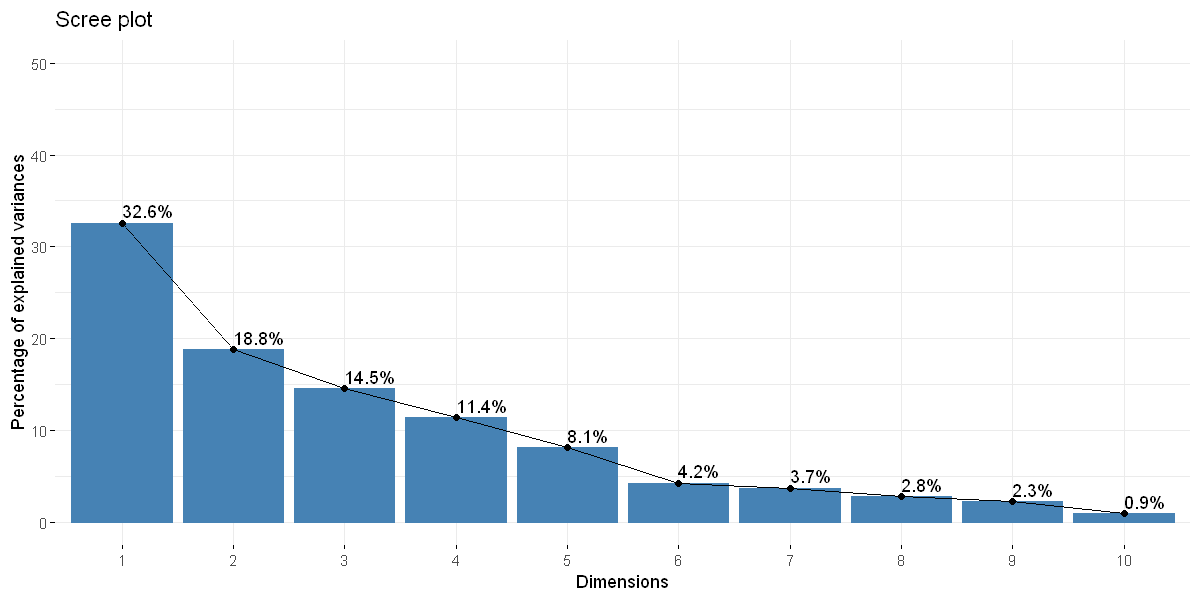

In [19]:
options(repr.plot.width=10, repr.plot.height=5)
fviz_eig(res.pca, addlabels = TRUE, ylim = c(0, 50))

In [20]:
var <- get_pca_var(res.pca)
var

Principal Component Analysis Results for variables
  Name       Description                                    
1 "$coord"   "Coordinates for the variables"                
2 "$cor"     "Correlations between variables and dimensions"
3 "$cos2"    "Cos2 for the variables"                       
4 "$contrib" "contributions of the variables"               

In [21]:
var$cor

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
fixed.acidity,0.836284759,-0.2062874304,-0.09011707,-0.298497821,0.10903021
volatile.acidity,-0.546835407,-0.1775769784,-0.49929143,0.456652507,0.11381151
citric.acid,0.868869952,0.0003285266,0.28804761,-0.092496575,-0.04304984
residual.sugar,0.233558858,-0.4832168104,0.24716711,0.337854763,0.67509487
chlorides,0.499532985,0.2895154792,-0.19850500,0.705725407,-0.16320874
free.sulfur.dioxide,0.005922264,0.8665925793,-0.04969140,-0.081085759,0.31872372
total.sulfur.dioxide,-0.036277912,0.8242737568,-0.14090839,-0.176454690,0.36390961
density,0.704917302,-0.2882189544,-0.50264193,-0.001303602,0.27967102
pH,-0.839660414,-0.0647157369,0.01466365,0.123046552,0.16280195
sulphates,0.522062709,0.3972931360,0.30639252,0.518942573,-0.15759813


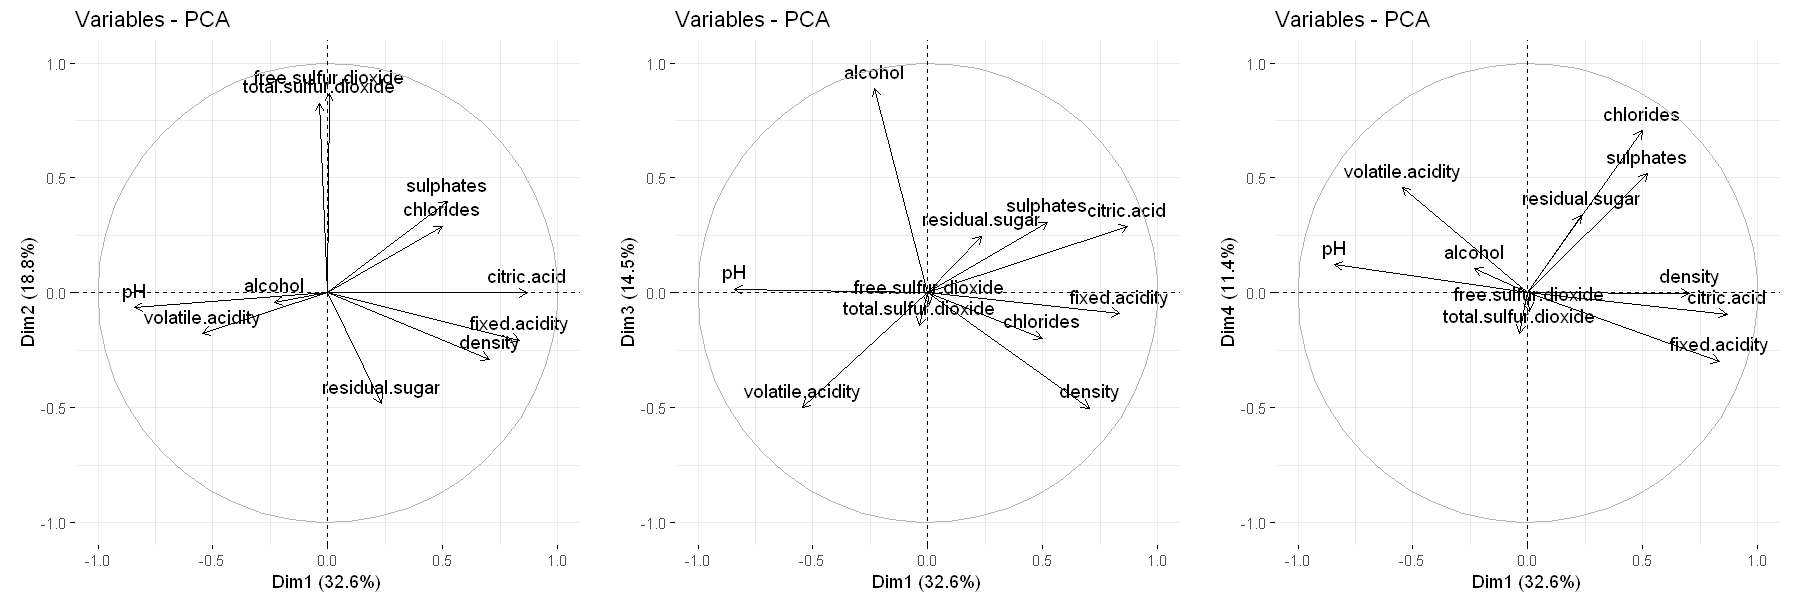

In [22]:
options(repr.plot.width=15, repr.plot.height=5)
p1 = fviz_pca_var(res.pca, col.var = "black")
p2 = fviz_pca_var(res.pca, col.var = "black", axes=c(1,3))
p3 = fviz_pca_var(res.pca, col.var = "black", axes=c(1,4))
grid.arrange(p1,p2,p3,ncol=3)

In [23]:
round_df <- function(x, digits) {
    numeric_columns <- sapply(x, mode) == 'numeric'
    x[numeric_columns] <-  round(x[numeric_columns], digits)
    x
}

round_df(var$cos2, 3)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
fixed.acidity,0.699,0.043,0.008,0.089,0.012
volatile.acidity,0.299,0.032,0.249,0.209,0.013
citric.acid,0.755,0.000,0.083,0.009,0.002
residual.sugar,0.055,0.233,0.061,0.114,0.456
chlorides,0.250,0.084,0.039,0.498,0.027
free.sulfur.dioxide,0.000,0.751,0.002,0.007,0.102
total.sulfur.dioxide,0.001,0.679,0.020,0.031,0.132
density,0.497,0.083,0.253,0.000,0.078
pH,0.705,0.004,0.000,0.015,0.027
sulphates,0.273,0.158,0.094,0.269,0.025


Warning message:
"package 'corrplot' was built under R version 3.6.3"corrplot 0.84 loaded


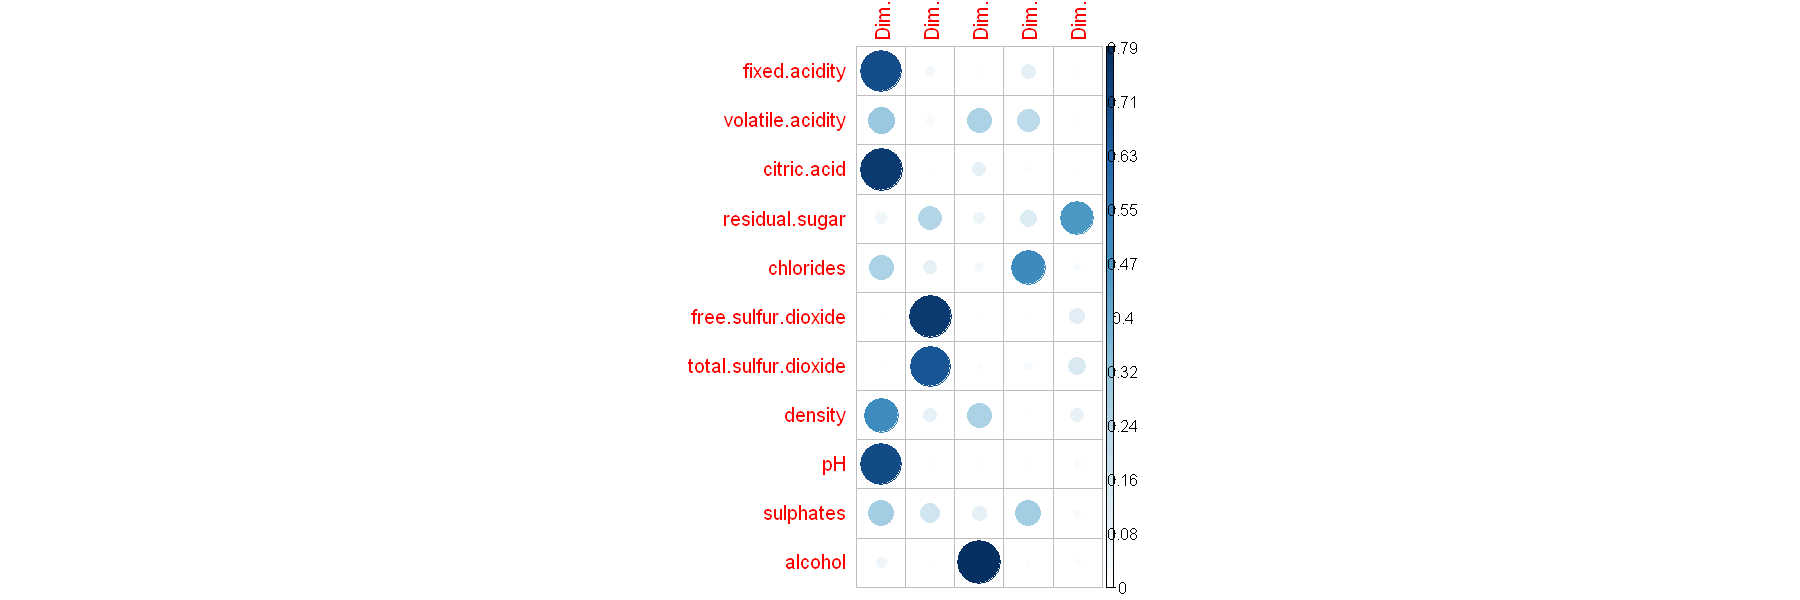

In [24]:
library("corrplot")
corrplot(var$cos2, is.corr=FALSE)

In [25]:
round_df(var$contrib, 3)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
fixed.acidity,19.501,2.057,0.508,7.118,1.328
volatile.acidity,8.338,1.524,15.579,16.660,1.447
citric.acid,21.051,0.000,5.185,0.684,0.207
residual.sugar,1.521,11.288,3.818,9.119,50.912
chlorides,6.958,4.052,2.462,39.789,2.976
free.sulfur.dioxide,0.001,36.303,0.154,0.525,11.348
total.sulfur.dioxide,0.037,32.844,1.241,2.487,14.794
density,13.856,4.016,15.789,0.000,8.738
pH,19.659,0.202,0.013,1.210,2.961
sulphates,7.600,7.630,5.867,21.515,2.775


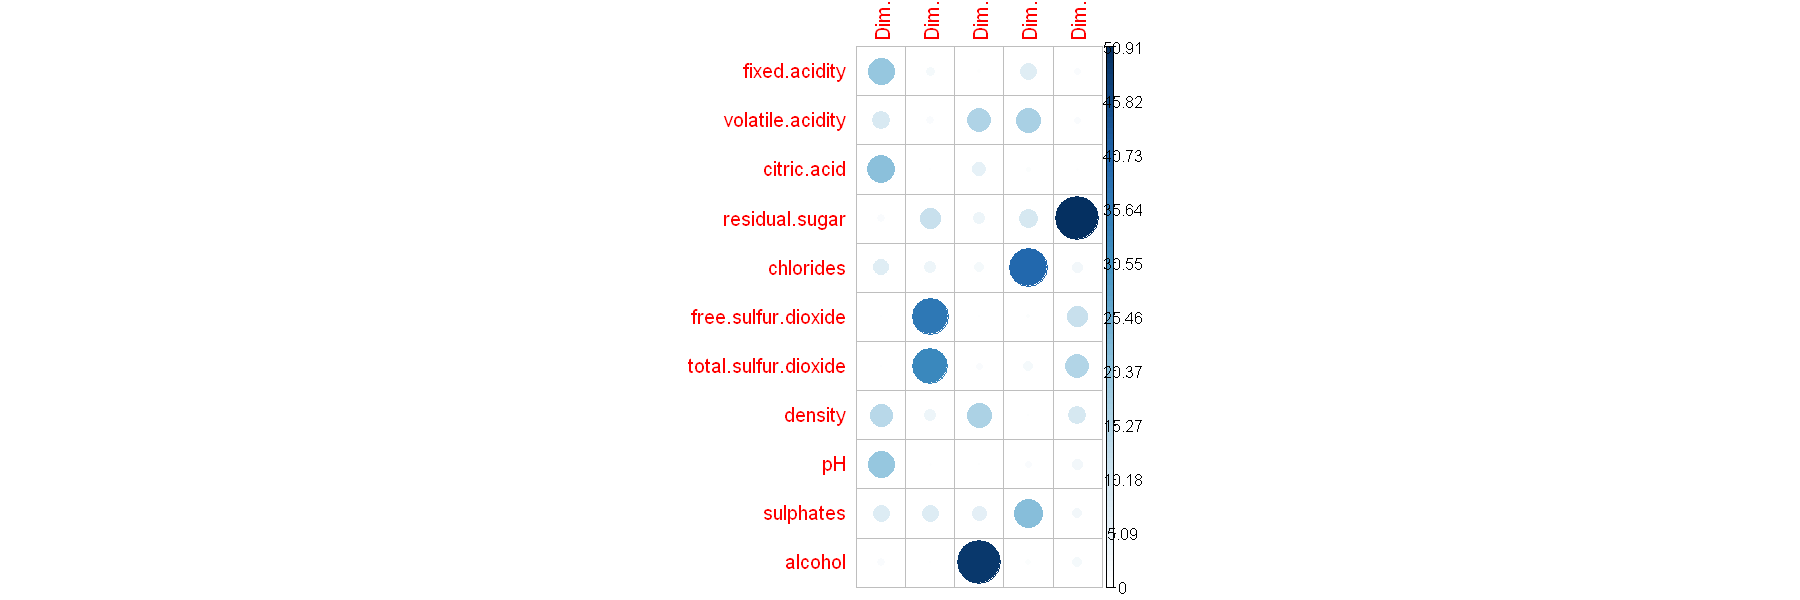

In [26]:
corrplot(var$contrib, is.corr=FALSE)

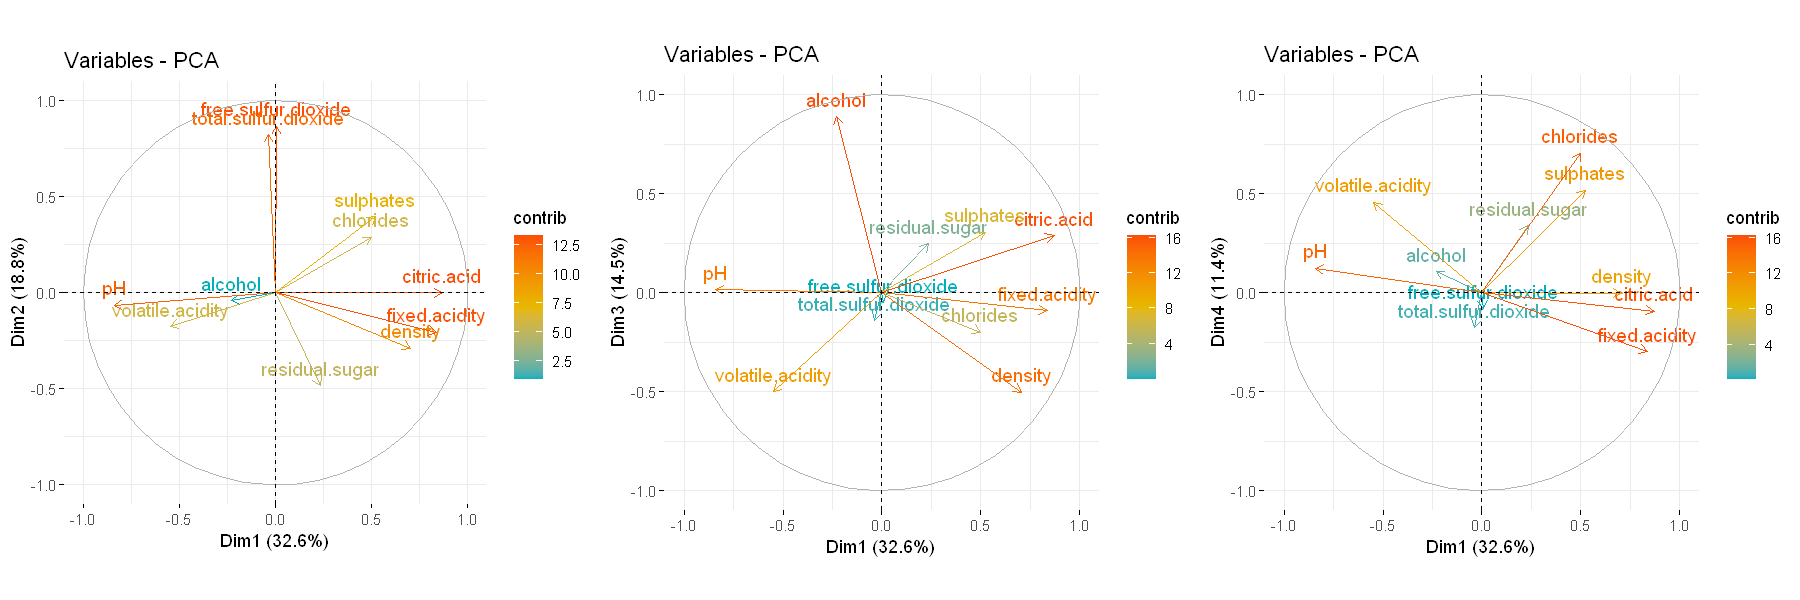

In [27]:
options(repr.plot.width=15, repr.plot.height=5)
p1 = fviz_pca_var(res.pca, col.var = "contrib",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07")
             )
p2 = fviz_pca_var(res.pca, col.var = "contrib",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), axes=c(1,3))
p3 = fviz_pca_var(res.pca, col.var = "contrib",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), axes=c(1,4))
grid.arrange(p1,p2,p3,ncol=3)

In [28]:
get_pca_ind(res.pca)

Principal Component Analysis Results for individuals
  Name       Description                       
1 "$coord"   "Coordinates for the individuals" 
2 "$cos2"    "Cos2 for the individuals"        
3 "$contrib" "contributions of the individuals"

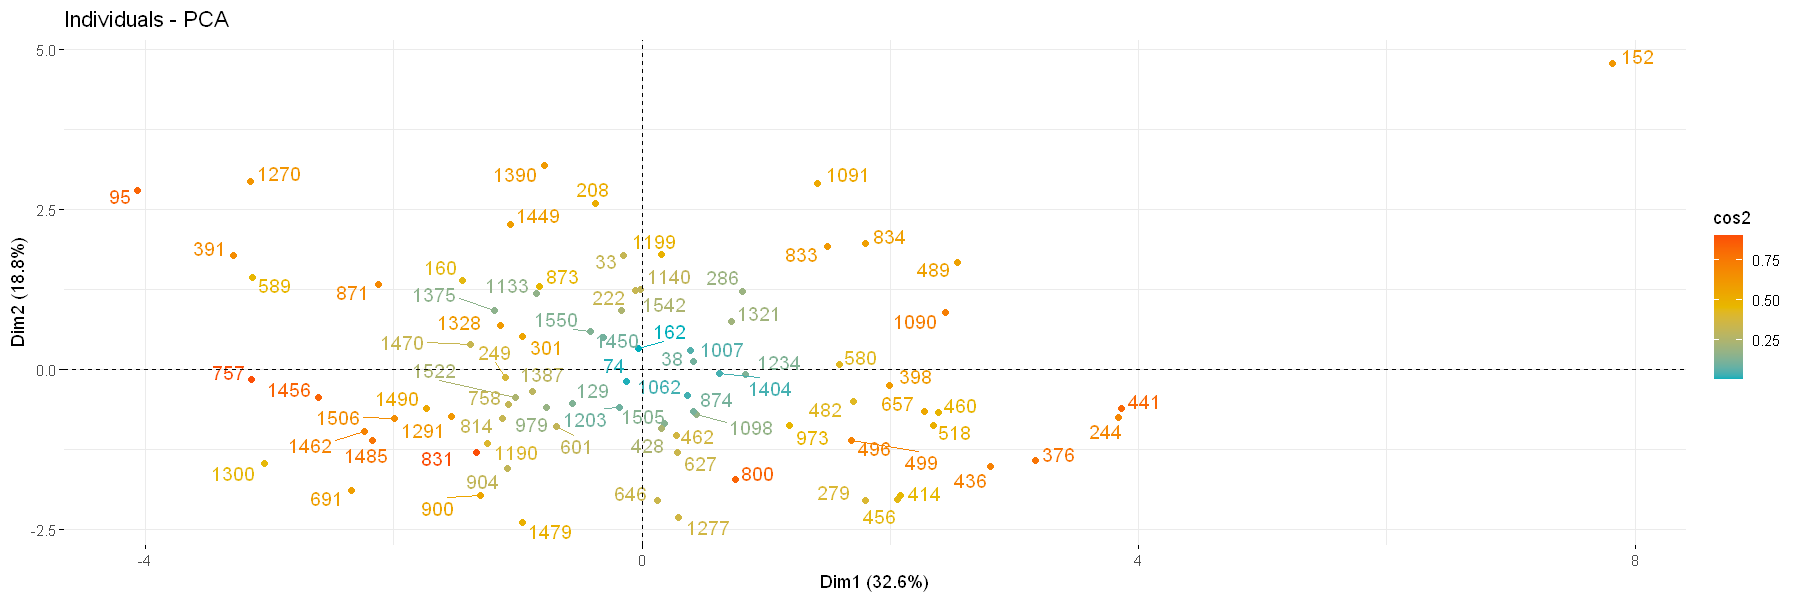

In [29]:
fviz_pca_ind(res.pca, col.ind = "cos2", 
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE # Avoid text overlapping (slow if many points)
             )

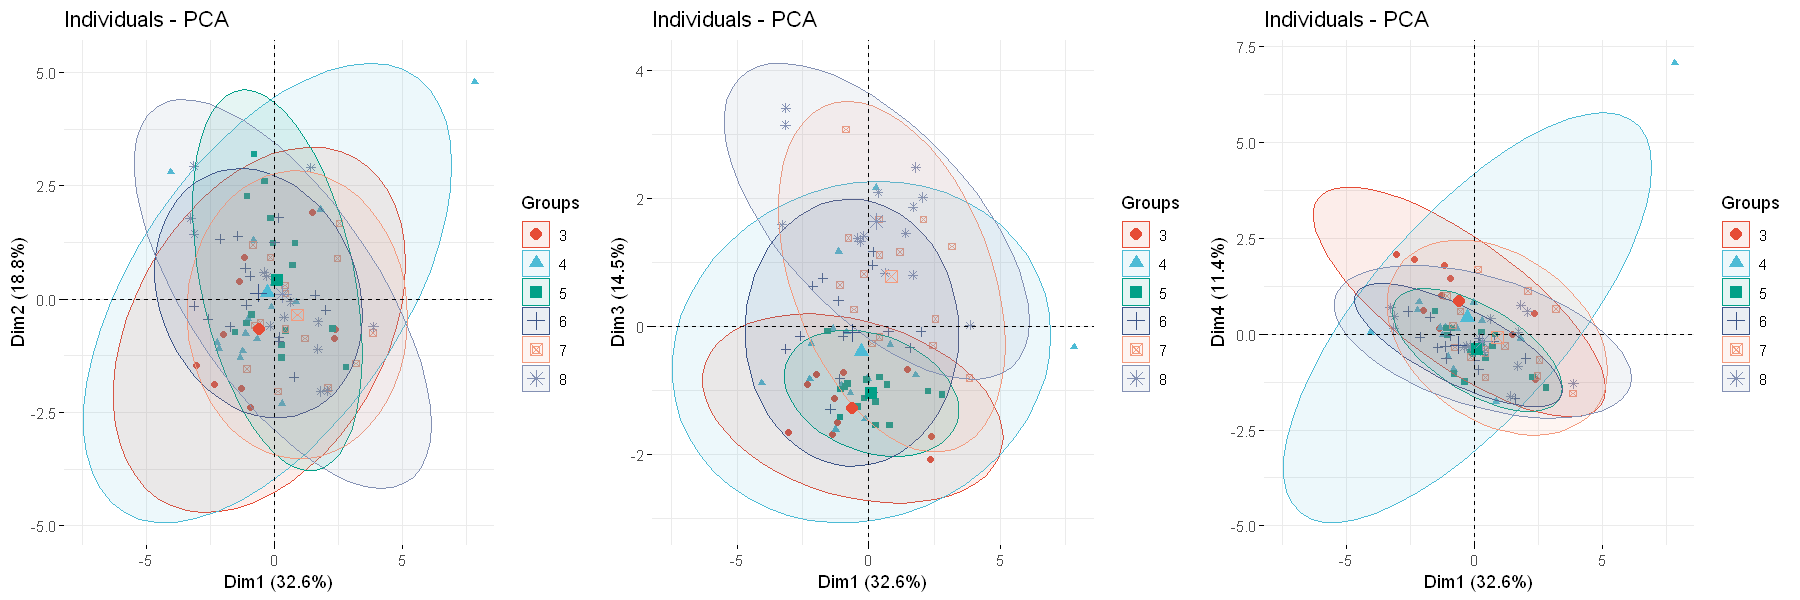

In [30]:
options(repr.plot.width=15, repr.plot.height=5)
p1 = fviz_pca_ind(res.pca,
             geom.ind = "point", # show points only (nbut not "text")
             col.ind = as.factor(data$quality), # color by groups
             palette = "npg",
             addEllipses = TRUE, # Concentration ellipses
             legend.title = "Groups",
             axes=c(1,2)
             )
p2 = fviz_pca_ind(res.pca,
             geom.ind = "point", # show points only (nbut not "text")
             col.ind = as.factor(data$quality), # color by groups
             palette = "npg",
             addEllipses = TRUE, # Concentration ellipses
             legend.title = "Groups",
             axes=c(1,3)
             )
p3 = fviz_pca_ind(res.pca,
             geom.ind = "point", # show points only (nbut not "text")
             col.ind = as.factor(data$quality), # color by groups
             palette = "npg",
             addEllipses = TRUE, # Concentration ellipses
             legend.title = "Groups",
             axes=c(1,4)
             )
grid.arrange(p1,p2,p3,ncol=3)